In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time
import pandas as pd

In [117]:
cars_data =pd.read_csv("cars.csv")

In [118]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [119]:
cars_data = cars_data[cars_data['fuel'].isin(['Petrol', 'Diesel'])]
cars_data.mileage = cars_data.mileage.str.split(expand=True)[0].astype(float)
cars_data.engine = cars_data.engine.str.split(expand=True)[0].astype(float)
cars_data.loc[cars_data['max_power'] == 'bph', 'max_power'] = ' bph'
cars_data.max_power = cars_data.max_power.str.split(expand=True)[0].astype(float)
cars_data = cars_data.drop(columns=['torque'])
cars_data = cars_data[cars_data['owner'] != 5]
from datetime import datetime
now = datetime.now()
cars_data['car_age'] = int(now.strftime("%Y")) - cars_data['year']

In [120]:
for col in ['fuel','seller_type','transmission', 'owner', 'seats']:  
    print(f"Column {col}: {len(cars_data[col].unique())} unique values: {cars_data[col].unique()}")

Column fuel: 2 unique values: ['Diesel' 'Petrol']
Column seller_type: 3 unique values: ['Individual' 'Dealer' 'Trustmark Dealer']
Column transmission: 2 unique values: ['Manual' 'Automatic']
Column owner: 5 unique values: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
Column seats: 10 unique values: [ 5.  4. nan  7.  8.  6.  9. 10. 14.  2.]


In [121]:
owner_coding = {'First Owner': 0,'Second Owner': 0, 'Third Owner': 0, 'Fourth & Above Owner': 0,'Test Drive Car': 1}
fuel_coding = {'Petrol' : 1, 'Diesel': 0 }
seller_coding = {'Individual' : 1,'Dealer' : 0,'Trustmark Dealer' : 0}
transmission_coding = {'Automatic' : 1, 'Manual' : 0}


In [122]:
cars_copy = cars_data.drop(['year','seats','engine'], axis = 1)
cars_copy['fuel'] = cars_copy['fuel'].map(fuel_coding)
cars_copy['owner'] = cars_copy['owner'].map(owner_coding)
cars_copy['seller_type'] = cars_copy['seller_type'].map(seller_coding)
cars_copy['transmission'] = cars_copy['transmission'].map(transmission_coding)
cars_copy.rename(columns = {'owner' : 'test_drive', 'fuel' : 'petrol_fuel', 'seller_type' : 'individual_seller', 'transmission' : 'is_automatic'}, inplace=True)

In [123]:
cars_copy.head()

,name,selling_price,km_driven,petrol_fuel,individual_seller,is_automatic,test_drive,mileage,max_power,car_age
0,Maruti Swift Dzire VDI,450000,145500,0,1,0,0,23.40,74.00,9
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,0,1,0,0,21.14,103.52,9
2,Honda City 2017-2020 EXi,158000,140000,1,1,0,0,17.70,78.00,17
3,Hyundai i20 Sportz Diesel,225000,127000,0,1,0,0,23.00,90.00,13
4,Maruti Swift VXI BSIII,130000,120000,1,1,0,0,16.10,88.20,16


In [124]:
cars_copy.describe().astype(int)

,selling_price,km_driven,petrol_fuel,individual_seller,is_automatic,test_drive,mileage,max_power,car_age
count,8033,8033,8033,8033,8033,8033,7819,7825,8033
mean,642736,69738,0,0,0,0,19,91,9
std,809863,56643,0,0,0,0,4,35,4
min,29999,1000,0,0,0,0,0,0,3
25%,260000,35000,0,1,0,0,16,69,6
50%,450000,60000,0,1,0,0,19,82,8
75%,680000,98000,1,1,0,0,22,102,12
max,10000000,2360457,1,1,1,1,42,400,40


Text(0.5, 1.0, 'Histogram of cars selling price')

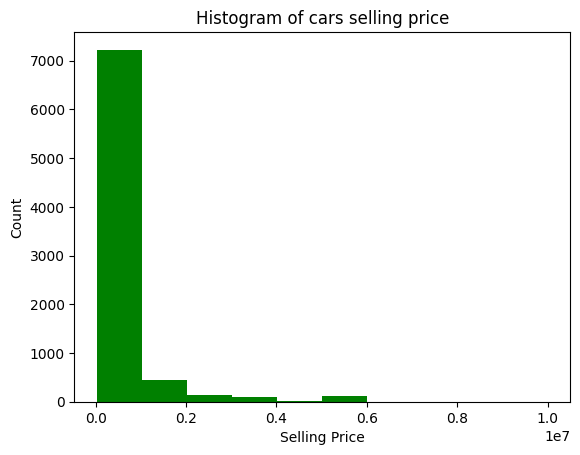

In [125]:

# the histogram of the data
plt.hist(cars_copy.selling_price, bins=10, facecolor='g')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.title('Histogram of cars selling price')





In [126]:
cars_copy['price_level'] =  pd.cut(cars_copy['selling_price'], bins=[0, 300000, 750000, 1500000, 15000000], labels = [0, 1, 2, 3])

#x1 = cars_copy.query('selling_price >= 750000')
#x2 = cars_copy.query(' 470000 <= selling_price < 750000')
#x3 = cars_copy.query('250000 <= selling_price < 470000')
#x4 = cars_copy.query('selling_price < 250000')

#x1.shape, x2.shape, x3.shape, x4.shape


In [127]:
cars_copy['price_level'].value_counts(sort=False)

price_level
0    2571
1    3953
2     980
3     529
Name: count, dtype: int64

In [128]:
cars_copy['price_level']=cars_copy.price_level.astype(int)

cars_copy['price_level_0']= (1 * cars_copy.price_level==0).astype(int)
cars_copy['price_level_1']= (1 * cars_copy.price_level==1).astype(int)
cars_copy['price_level_2']= (1 * cars_copy.price_level==2).astype(int)
cars_copy['price_level_3']= (1 * cars_copy.price_level==3).astype(int)

In [129]:
cars_copy['intercept']=1

In [130]:
def log_func(x):
    return np.log(x)

cars_copy['ln_price'] = cars_copy['selling_price'].apply(log_func)


In [131]:
cars_copy=cars_copy.reindex(['name','selling_price','ln_price','price_level','price_level_0','price_level_1','price_level_2','price_level_3','intercept',
                              'km_driven','mileage','max_power','car_age','petrol_fuel','individual_seller','test_drive','is_automatic'],axis=1)

In [132]:
cars_copy_out = cars_copy.loc[cars_copy['km_driven'] < 190000]
cars_copy_out = cars_copy_out.loc[cars_copy_out['max_power'] < 200]
cars_copy_out = cars_copy_out.loc[cars_copy_out['car_age'] < 20]
cars_copy_out = cars_copy_out.loc[cars_copy_out['mileage'] < 30]

In [133]:
cars_copy_out.describe()

,selling_price,ln_price,price_level,price_level_0,price_level_1,price_level_2,price_level_3,intercept,km_driven,mileage,max_power,car_age,petrol_fuel,individual_seller,test_drive,is_automatic
count,7.444000e+03,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.0,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000
mean,6.275962e+05,13.014027,0.949624,0.298764,0.513031,0.128023,0.060183,1.0,64751.964804,19.553581,90.692634,8.749194,0.451370,0.826975,0.000672,0.127082
std,7.196087e+05,0.774984,0.815518,0.457747,0.499864,0.334137,0.237841,0.0,39623.501155,3.936885,32.247782,3.484920,0.497663,0.378295,0.025910,0.333087
min,3.150400e+04,10.357870,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1000.000000,0.000000,34.200000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000e+05,12.524526,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,32457.750000,16.950000,69.000000,6.000000,0.000000,1.000000,0.000000,0.000000
50%,4.599990e+05,13.038980,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,60000.000000,19.490000,82.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,6.900000e+05,13.444447,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,90000.000000,22.320000,102.000000,11.000000,1.000000,1.000000,0.000000,0.000000
max,6.523000e+06,15.690845,3.000000,1.000000,1.000000,1.000000,1.000000,1.0,189000.000000,28.400000,198.500000,19.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
cars_copy_out['price_level'].value_counts(sort = False)

price_level
1    3819
0    2224
2     953
3     448
Name: count, dtype: int64

In [136]:
Y = cars_copy_out[['price_level_0','price_level_1', 'price_level_2', 'price_level_3']]
X = cars_copy_out.drop(columns = ['name','selling_price','ln_price','price_level','price_level_0','price_level_1', 'price_level_2', 'price_level_3',
                                  'test_drive','individual_seller','petrol_fuel'])
X.shape, Y.shape

((7444, 6), (7444, 4))

In [137]:
from sklearn.model_selection import train_test_split
X_train,  X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.30, random_state=370)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5210, 6), (2234, 6), (5210, 4), (2234, 4))

In [138]:
X_train.isna().sum(), X_test.isna().sum()

(intercept       0
 km_driven       0
 mileage         0
 max_power       0
 car_age         0
 is_automatic    0
 dtype: int64,
 intercept       0
 km_driven       0
 mileage         0
 max_power       0
 car_age         0
 is_automatic    0
 dtype: int64)

## Scalling features for train set

In [139]:
denum_km_driven = X_train['km_driven'].max()-X_train['km_driven'].min()
num_km_driven = X_train['km_driven']-X_train['km_driven'].min()
X_train['km_driven'] = num_km_driven/denum_km_driven

denum_max_power = X_train['max_power'].max()-X_train['max_power'].min()
num_max_power = X_train['max_power']-X_train['max_power'].min()
X_train['max_power'] = num_max_power/denum_max_power

X_train['mileage'] = (X_train['mileage'] - X_train['mileage'].mean()) / X_train['mileage'].std()
X_train['car_age'] = (X_train['car_age'] - X_train['car_age'].mean()) / X_train['car_age'].std()



In [140]:
X_train.head()

,intercept,km_driven,mileage,max_power,car_age,is_automatic
1305,1,0.526596,0.214111,0.272063,1.508961,0
2643,1,0.294096,1.132515,0.242057,-0.790198,0
3209,1,0.260638,-0.482262,0.692270,-0.790198,0
4147,1,0.047872,0.012263,0.289714,-1.364988,1
361,1,0.356383,-1.264420,0.689592,0.359382,1


## Scalling features for test set

In [141]:
denum_km_driven = X_test['km_driven'].max()-X_test['km_driven'].min()
num_km_driven = X_test['km_driven']-X_test['km_driven'].min()
X_test['km_driven'] = num_km_driven/denum_km_driven

denum_max_power = X_test['max_power'].max()-X_test['max_power'].min()
num_max_power = X_test['max_power']-X_test['max_power'].min()
X_test['max_power'] = num_max_power/denum_max_power

X_test['mileage'] = (X_test['mileage'] - X_test['mileage'].mean()) / X_test['mileage'].std()
X_test['car_age'] = (X_test['car_age'] - X_test['car_age'].mean()) / X_test['car_age'].std()

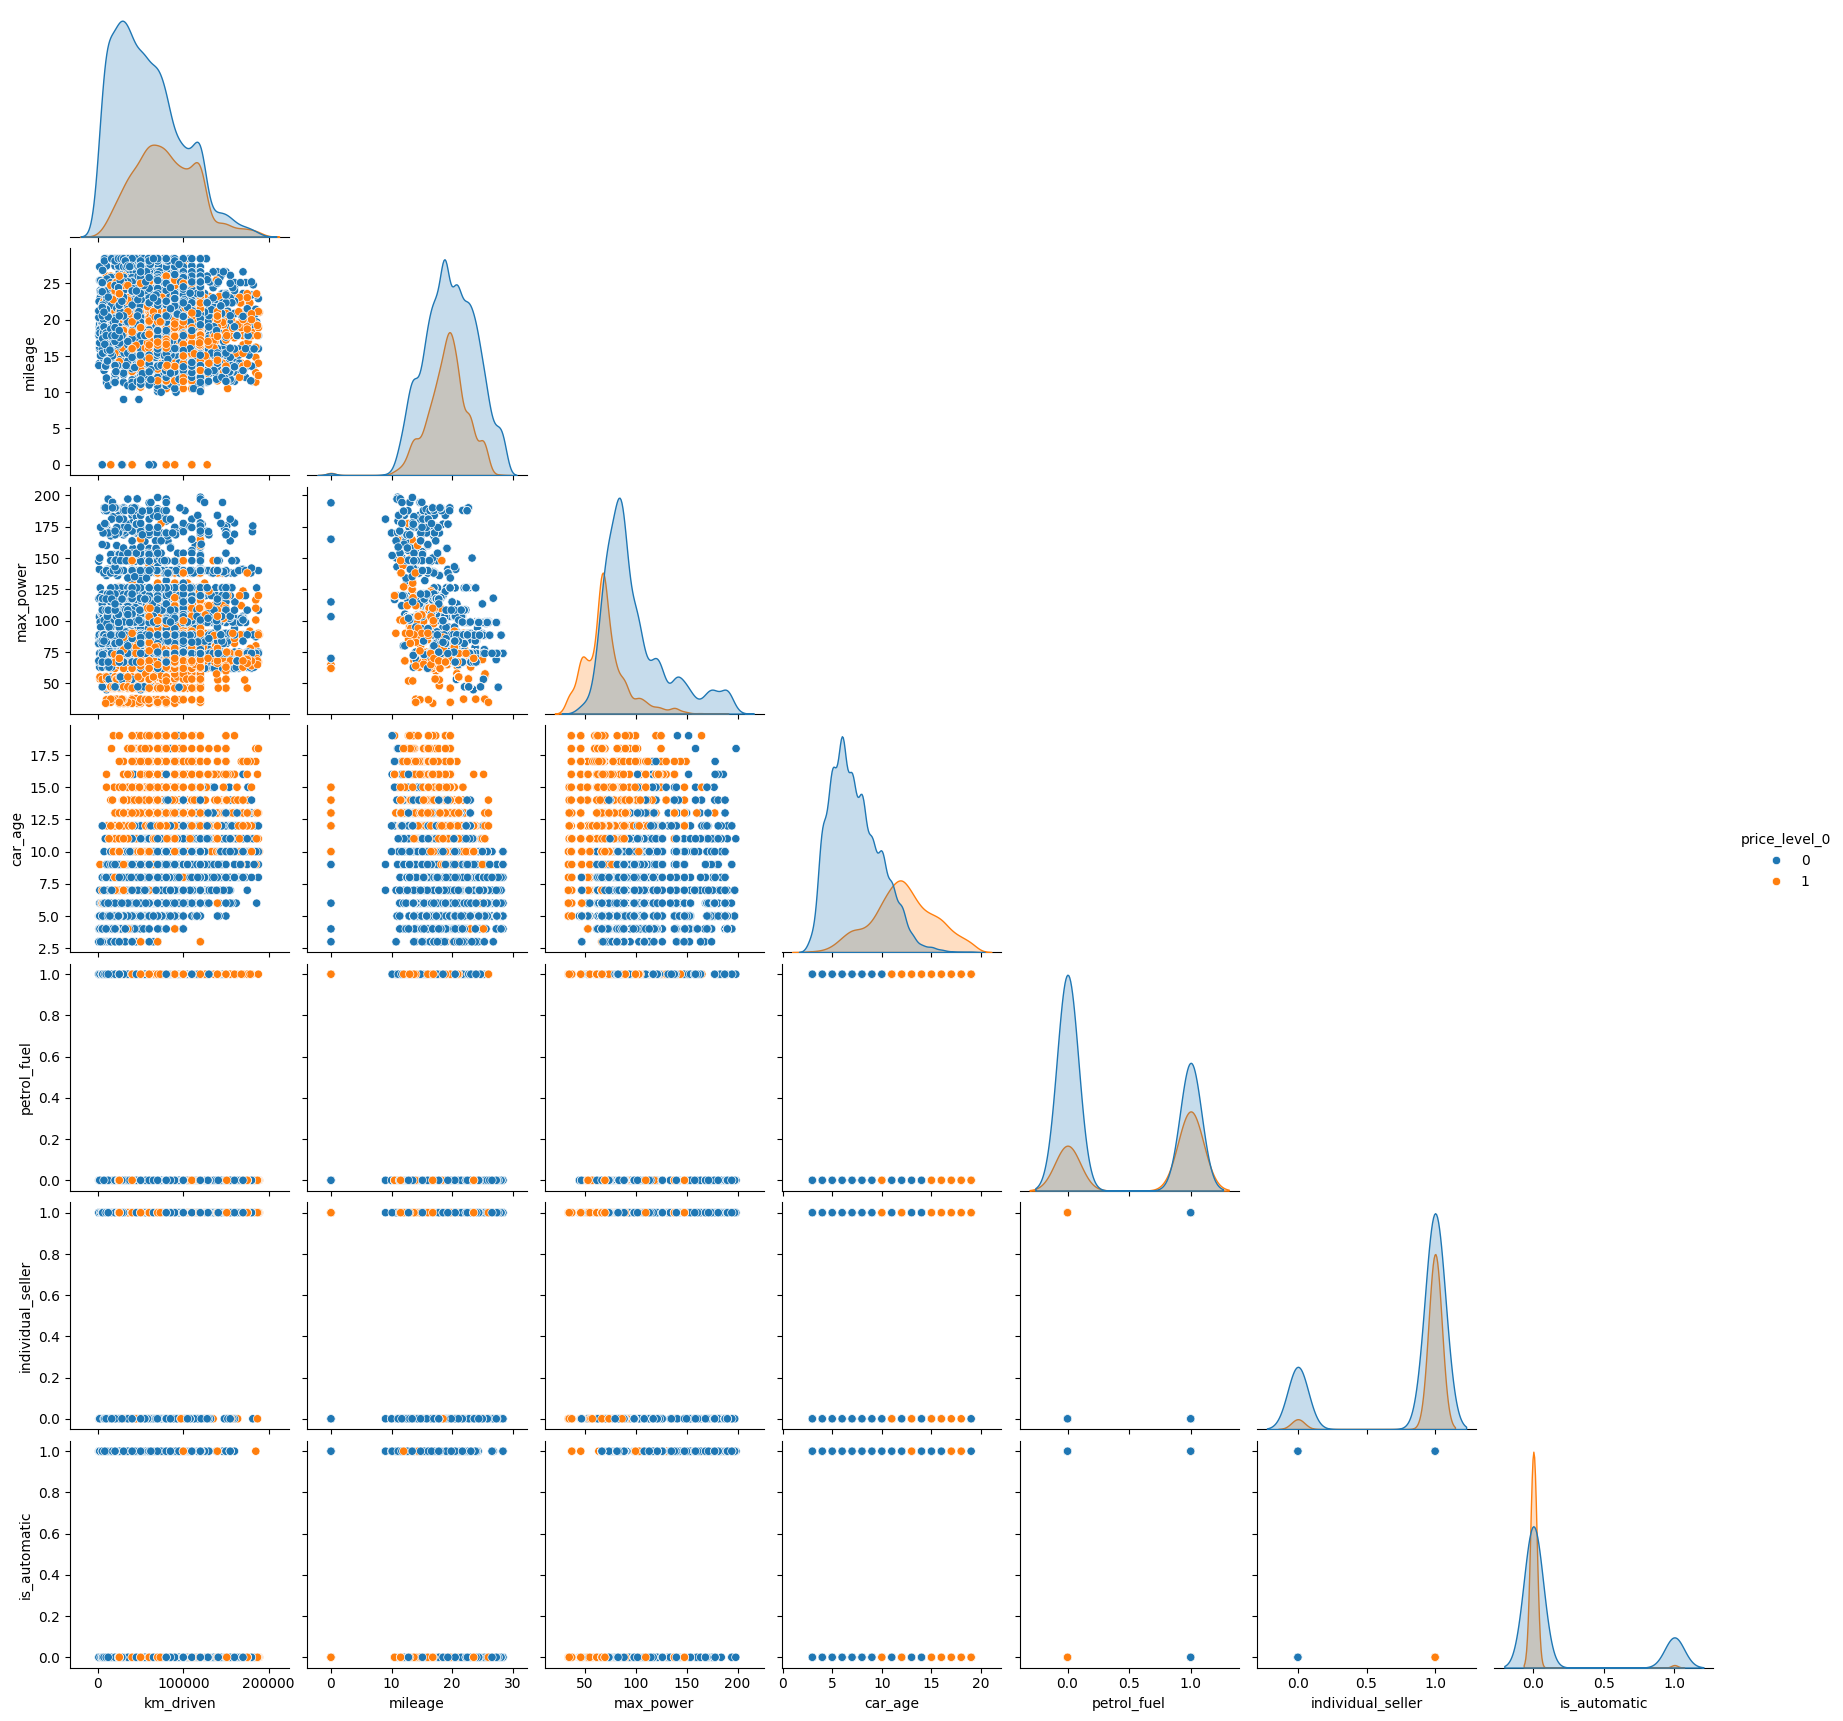

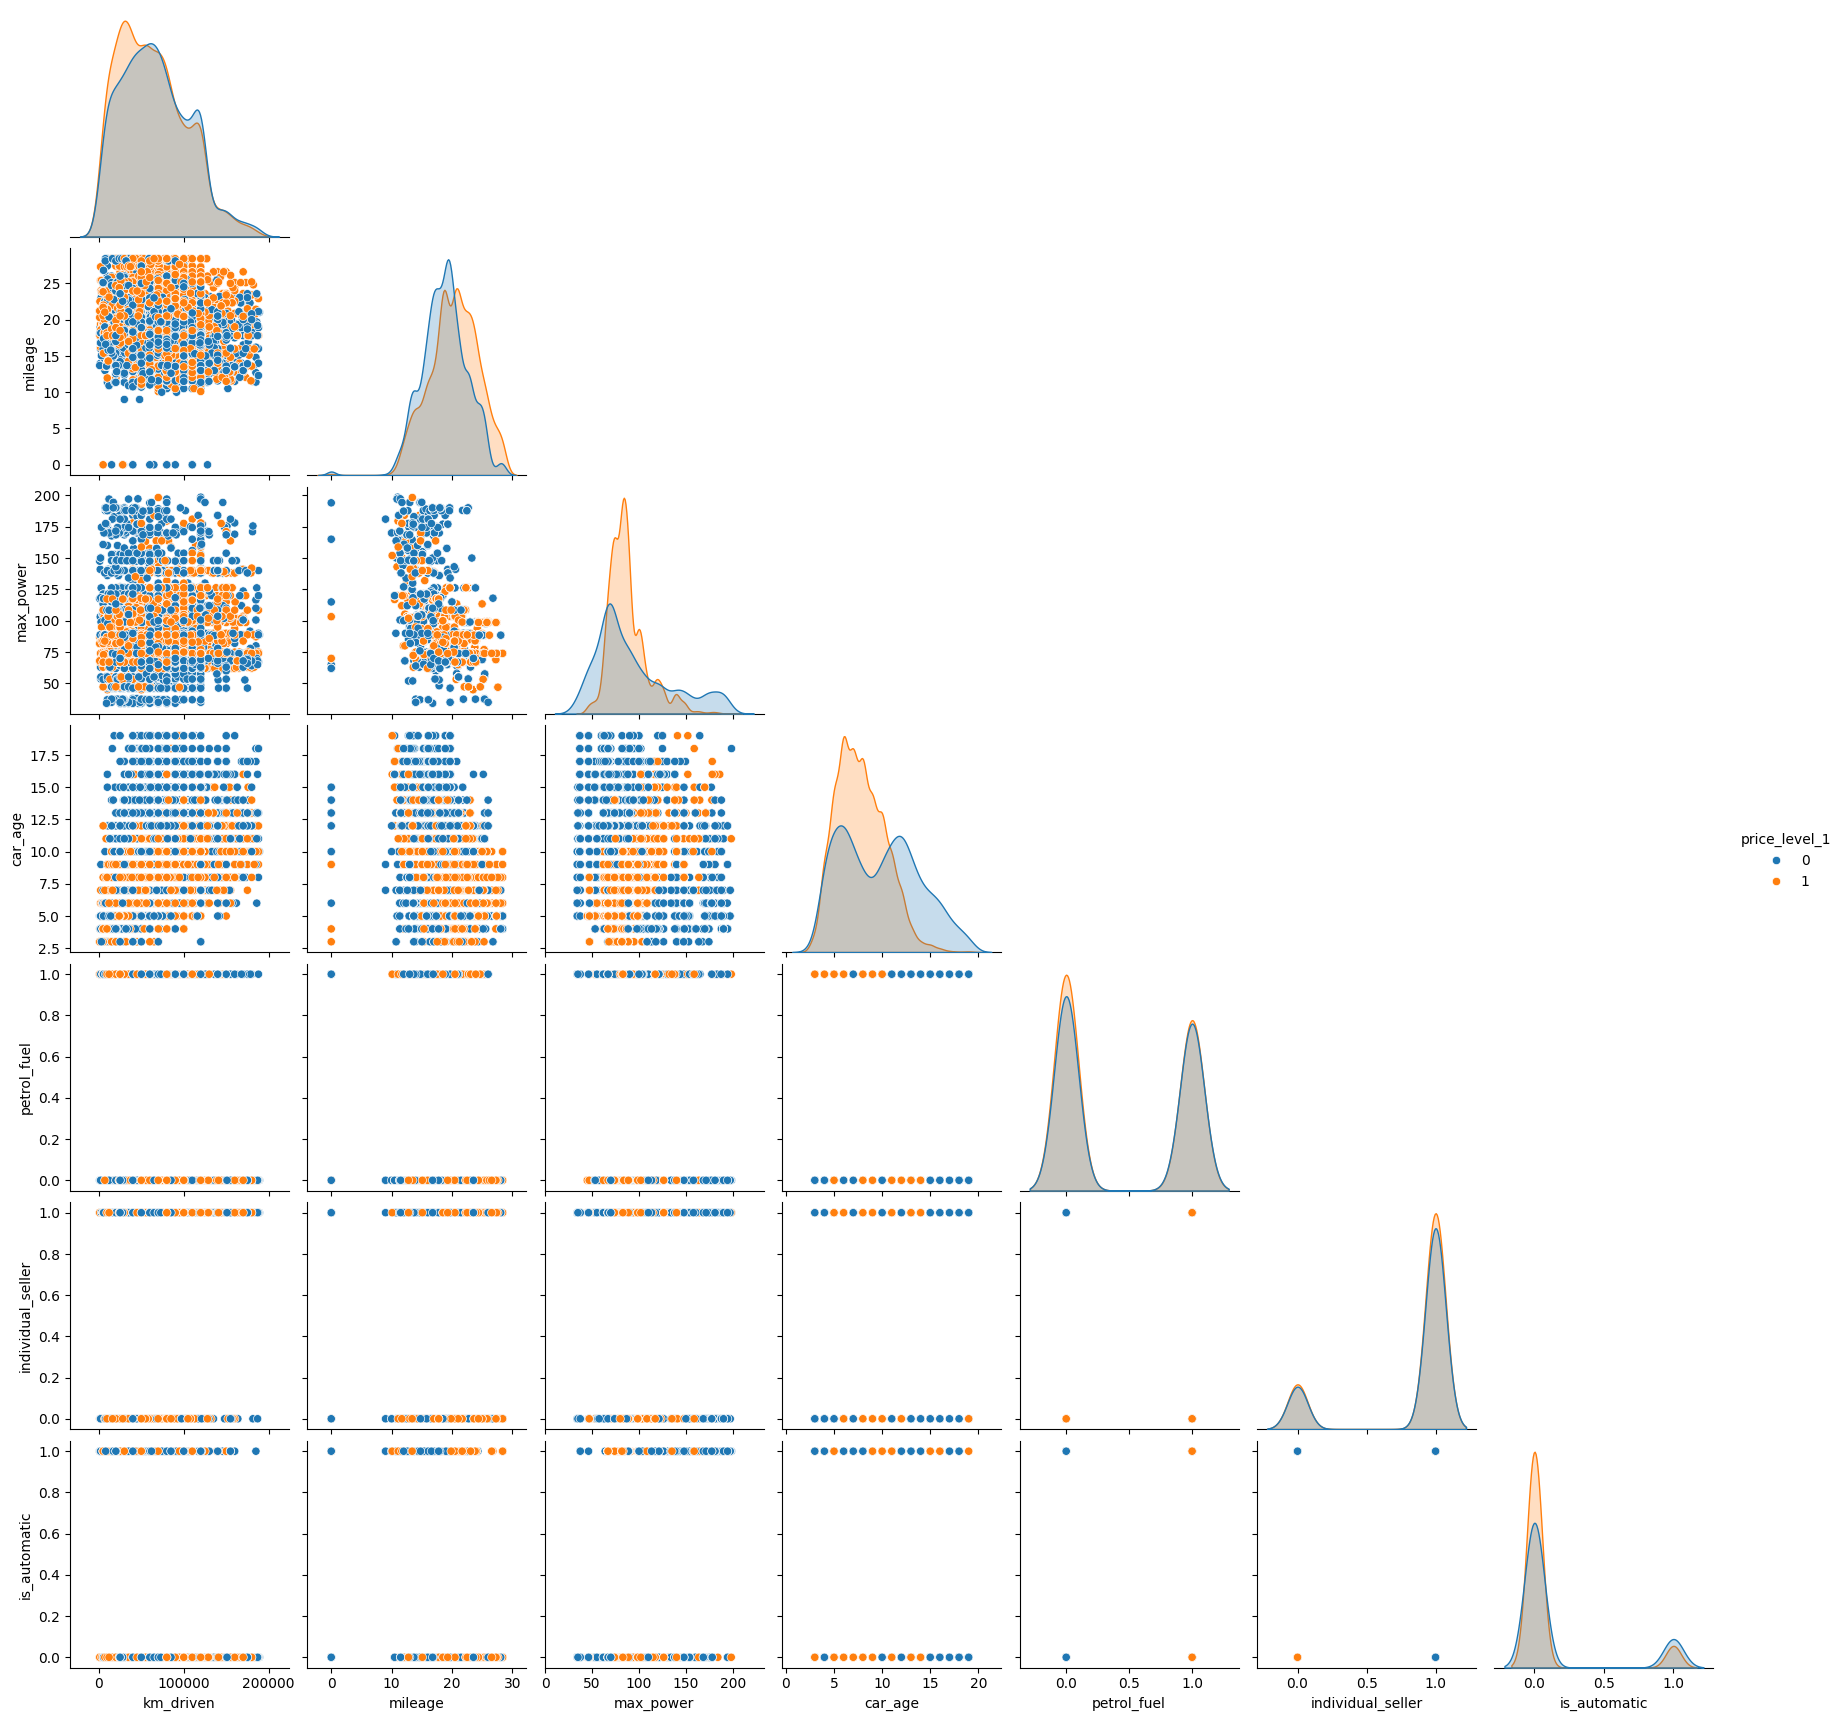

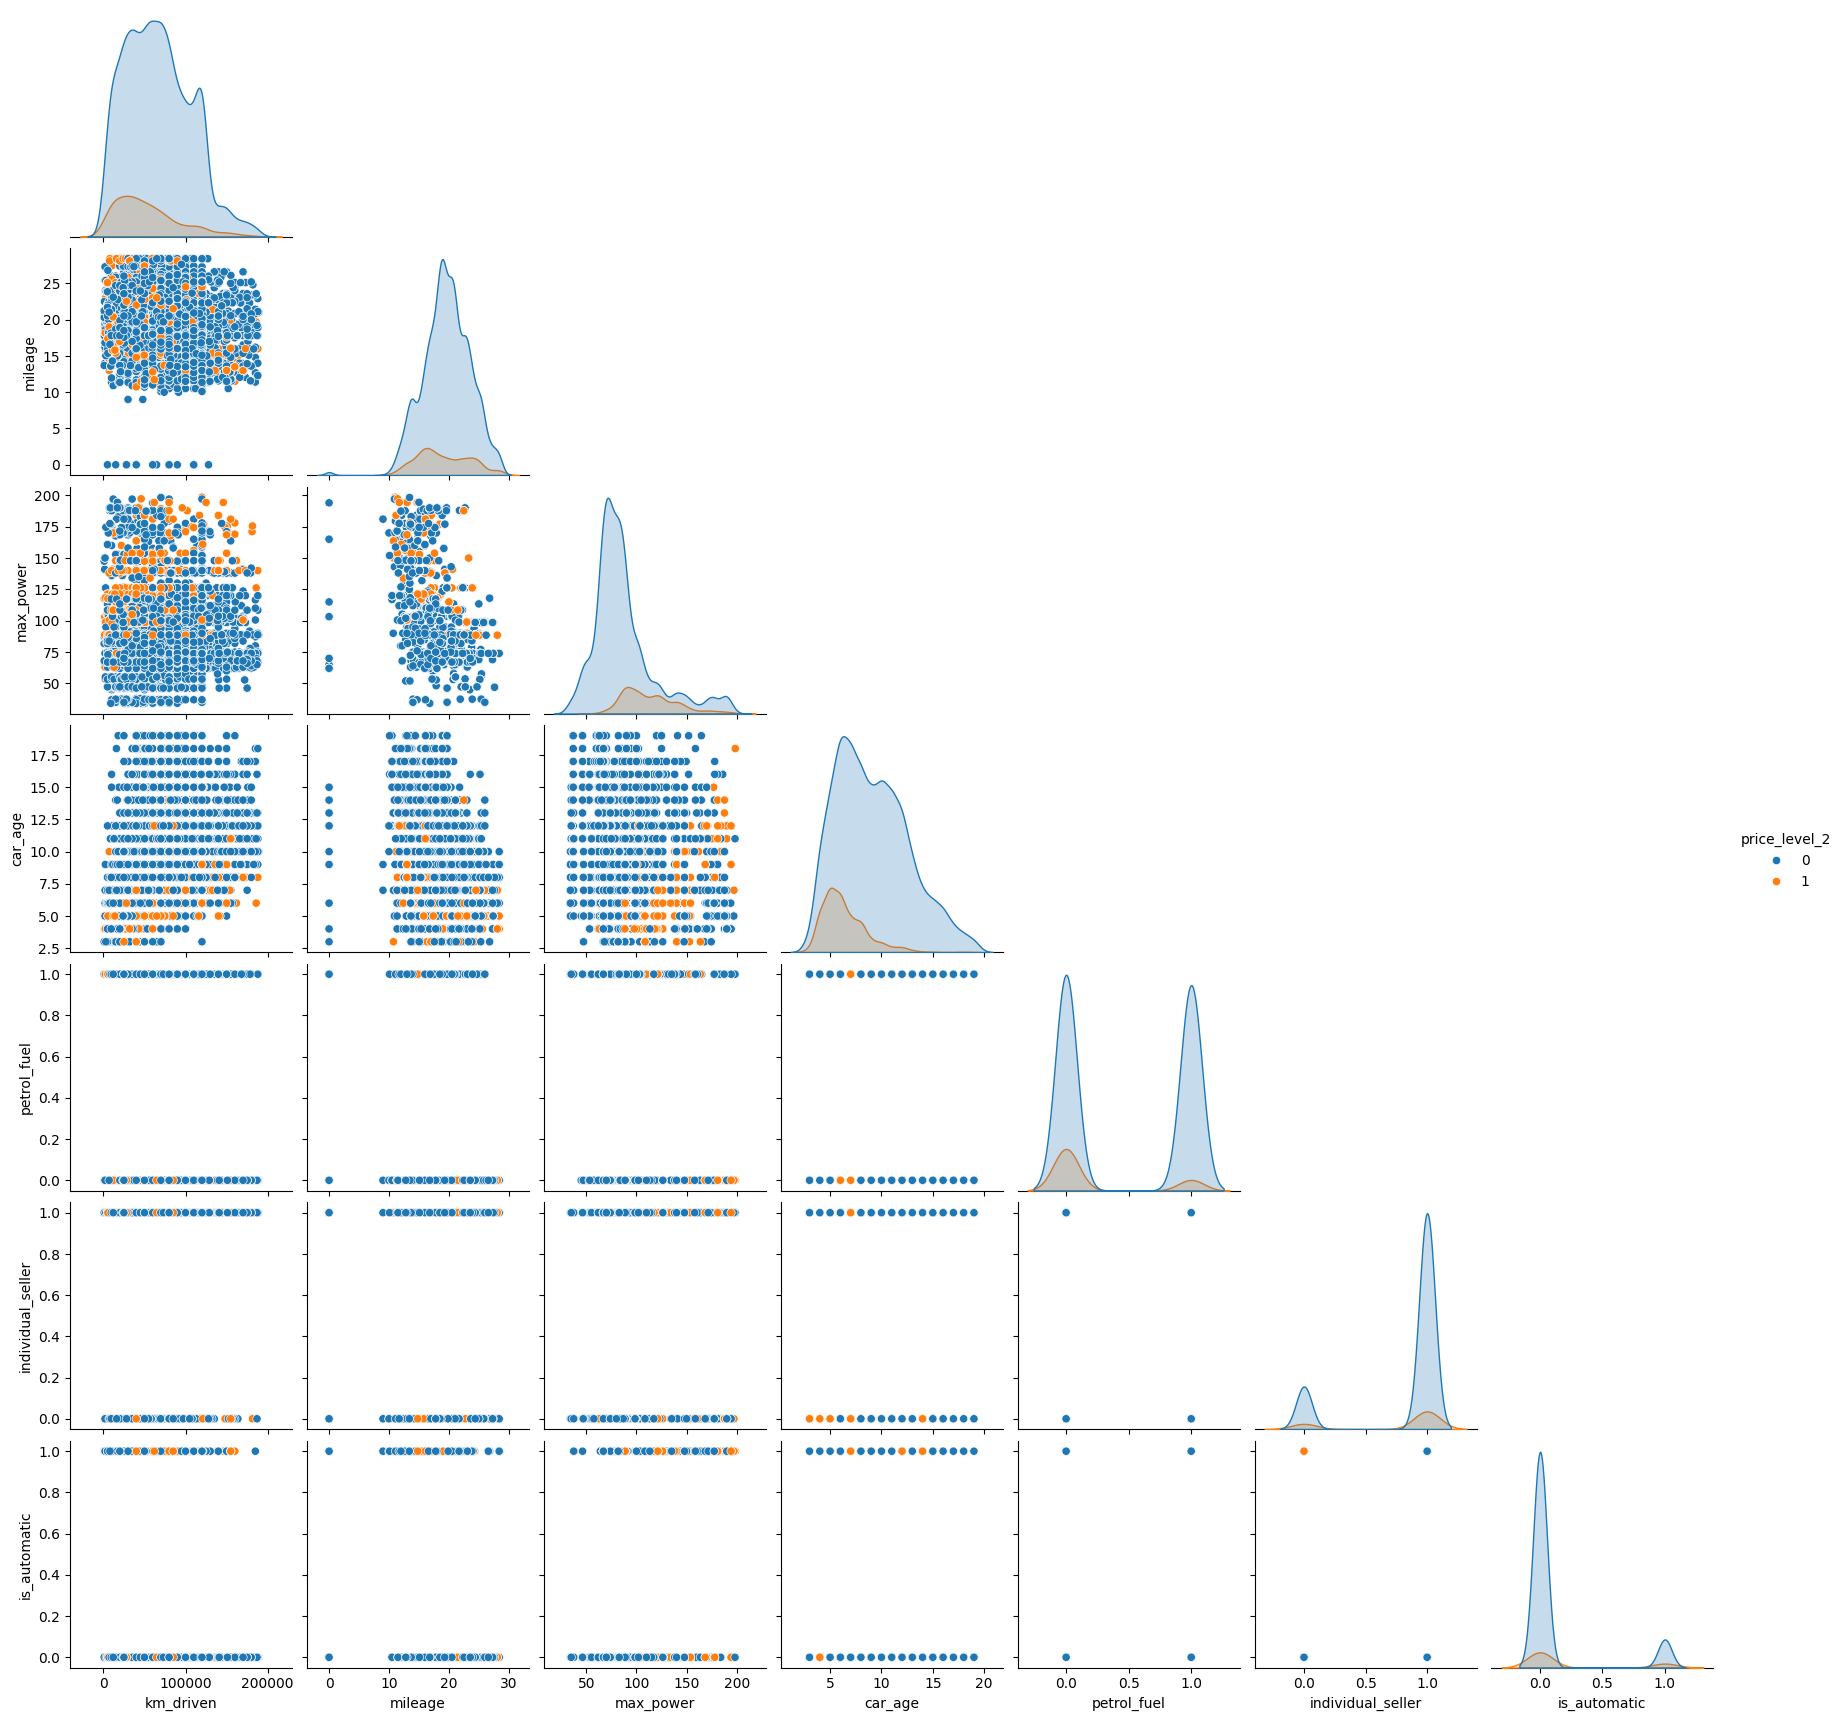

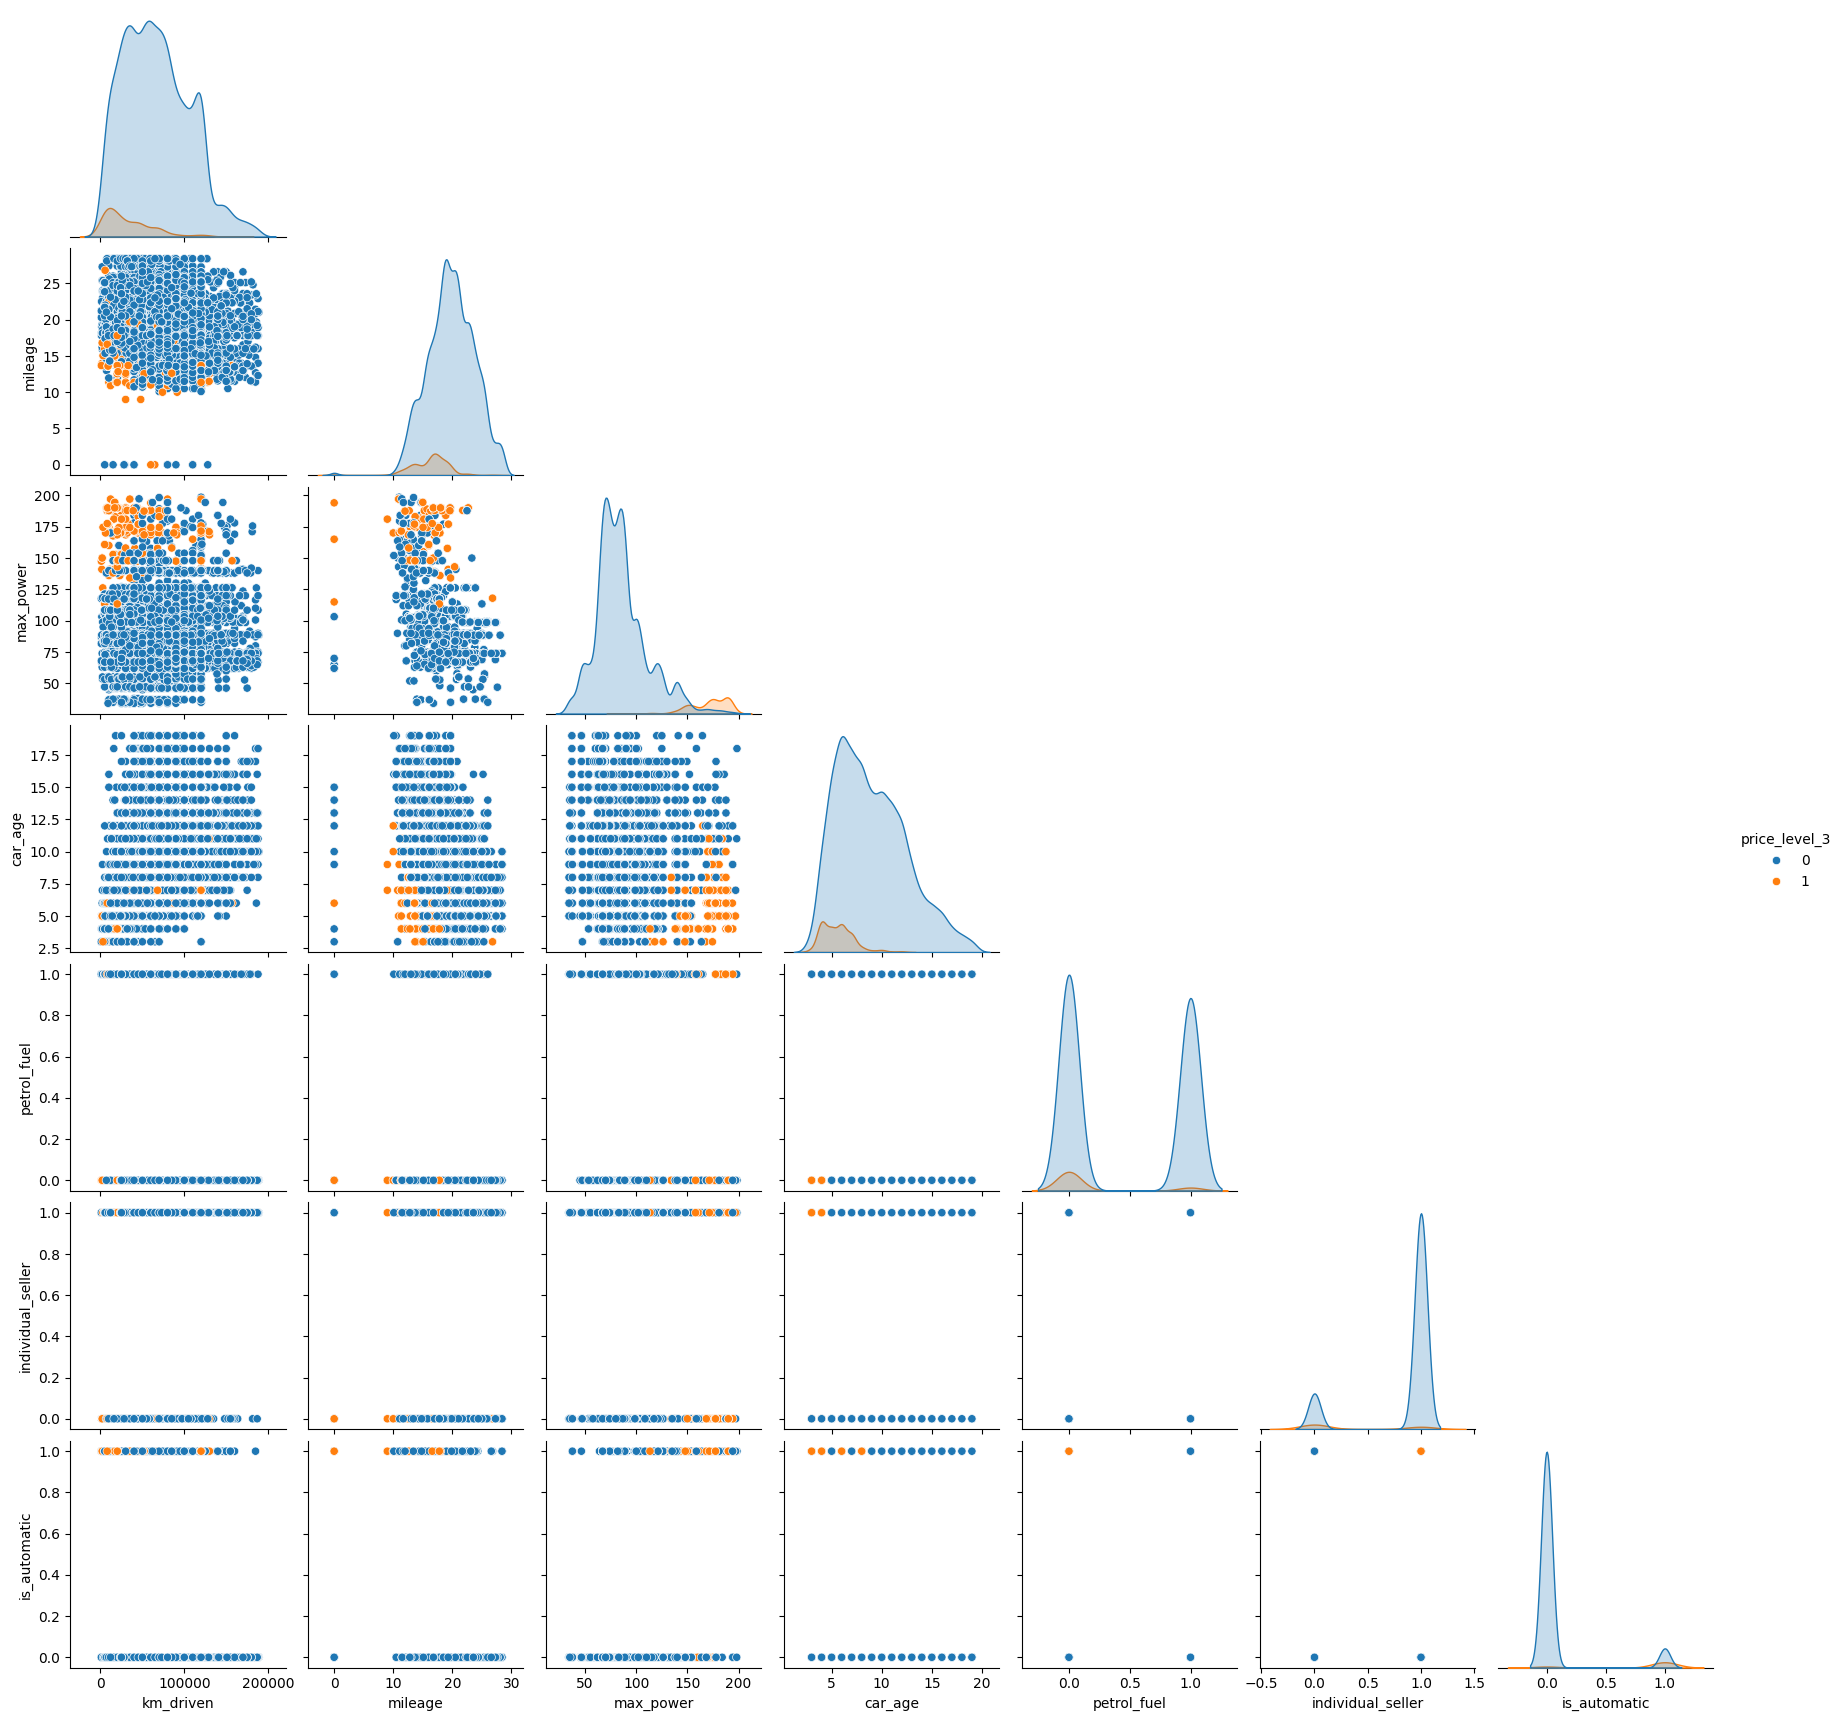

In [142]:
import seaborn as sns
sns.pairplot(data = cars_copy_out,vars= ['km_driven','mileage','max_power', 'car_age',
                                         'petrol_fuel', 'individual_seller', 'is_automatic'],hue='price_level_0', corner = True)
plt.show()

sns.pairplot(data = cars_copy_out,vars= ['km_driven','mileage','max_power', 'car_age',
                                         'petrol_fuel', 'individual_seller', 'is_automatic'],hue='price_level_1', corner = True)
plt.show()

sns.pairplot(data = cars_copy_out,vars= ['km_driven','mileage','max_power', 'car_age',
                                         'petrol_fuel', 'individual_seller', 'is_automatic'],hue='price_level_2', corner = True)
plt.show()

sns.pairplot(data = cars_copy_out,vars= ['km_driven','mileage','max_power', 'car_age',
                                         'petrol_fuel', 'individual_seller', 'is_automatic'],hue='price_level_3', corner = True)
plt.show()

In [143]:
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=5000, ridge_l=0.0):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.ridge_l = ridge_l
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k) 
        self.losses = []
                
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 1000 == 0:
                    print(f"Loss at iteration {i}:", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 1000 == 0:
                    print(f"Loss at iteration {i}:", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 1000 == 0:
                    print(f"Loss at iteration {i}:", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error) + self.ridge_l * np.sum(np.square(self.W))
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def accuracy(self, y_test, yhat):
        correct_predictions = np.sum(y_test == yhat)
        all_predictions = len(y_test)
        return correct_predictions / all_predictions
    
    def precision(self, y_test, yhat, class_idx):
        tp = np.sum((y_test == class_idx) & (yhat == class_idx))
        fp = np.sum((y_test != class_idx) & (yhat == class_idx))
        return tp / (tp + fp)

    def recall(self, y_test, yhat, class_idx):
        tp = np.sum((y_test == class_idx) & (yhat == class_idx))
        fn = np.sum((y_test == class_idx) & (yhat != class_idx))
        return tp / (tp + fn)

    def f1_score(self, y_test, yhat, class_idx):
        precision = self.precision(y_test, yhat, class_idx)
        recall = self.recall(y_test, yhat, class_idx)
        return 2 * (precision * recall) / (precision + recall)
    
    def macro_precision(self, y_test, yhat):
        num_classes = len(np.unique(y_test))
        precisions = []
        for class_idx in range(num_classes):
            precision = self.precision(y_test, yhat, class_idx)
            precisions.append(precision)
        return np.mean(precisions)

    def macro_recall(self, y_test, yhat):
        num_classes = len(np.unique(y_test))
        recalls = []
        for class_idx in range(num_classes):
            recall = self.recall(y_test, yhat, class_idx)
            recalls.append(recall)
        return np.mean(recalls)

    def macro_f1_score(self, y_test, yhat):
        macro_precision = self.macro_precision(y_test, yhat)
        macro_recall = self.macro_recall(y_test, yhat)
        return 2 * (macro_precision * macro_recall) / (macro_precision + macro_recall)

    def weighted_precision(self, y_test, yhat):
        num_classes = len(np.unique(y_test))
        weights = np.bincount(y_test) / len(y_test)
        precisions = []
        for class_idx in range(num_classes):
            precision = self.precision(y_test, yhat, class_idx)
            precisions.append(precision * weights[class_idx])
        return np.sum(precisions)

    def weighted_recall(self, y_test, yhat):
        num_classes = len(np.unique(y_test))
        weights = np.bincount(y_test) / len(y_test)
        recalls = []
        for class_idx in range(num_classes):
            recall = self.recall(y_test, yhat, class_idx)
            recalls.append(recall * weights[class_idx])
        return np.sum(recalls)

    def weighted_f1_score(self, y_test, yhat):
        weighted_precision = self.weighted_precision(y_test, yhat)
        weighted_recall = self.weighted_recall(y_test, yhat)
        return 2 * (weighted_precision * weighted_recall) / (weighted_precision + weighted_recall)

    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

In [144]:
X_train_nm = X_train.to_numpy()
Y_train_nm = Y_train.to_numpy()
X_test_nm = X_test.to_numpy()
Y_test_nm = Y_test.to_numpy()


In [146]:
k = Y_train_nm.shape[1]  # no. of class  
m = X_train_nm.shape[0]  # no.of samples
n = X_train_nm.shape[1]
k,m,n

(4, 5210, 6)

In [150]:
y_test =0 * Y_test['price_level_0']+1 * Y_test['price_level_1']+ 2 * Y_test['price_level_2']+3 * Y_test['price_level_3']
y_test.value_counts()

1    1143
0     677
2     284
3     130
Name: count, dtype: int64

Loss at iteration 0: 1.3800792318892172
Loss at iteration 1000: 0.5482981573169041
Loss at iteration 2000: 0.5490675698444998
Loss at iteration 3000: 0.5184019325847734
Loss at iteration 4000: 0.5199908091515051
time taken: 0.799252986907959
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.83      0.80      0.81       677
           1       0.77      0.86      0.81      1143
           2       0.67      0.39      0.49       284
           3       0.86      0.89      0.88       130

    accuracy                           0.79      2234
   macro avg       0.78      0.74      0.75      2234
weighted avg       0.78      0.79      0.78      2234



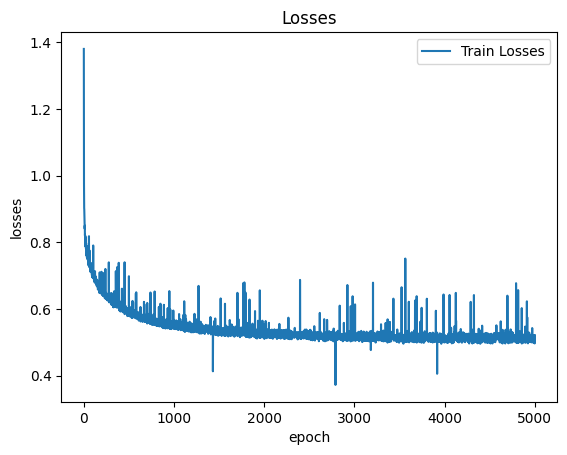

In [157]:
model = LogisticRegression(k, n, "minibatch", ridge_l=0.001)
model.fit(X_train_nm, Y_train_nm)
yhat = model.predict(X_test_nm)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))


In [162]:
model = LogisticRegression(k, n, "minibatch", alpha=0.001, ridge_l=0.001)
model.fit(X_train_nm, Y_train_nm)
yhat = model.predict(X_test_nm)
model.accuracy(y_test,yhat)
print("="*10, "Classification report" ,"="*10)
print("accuracy", "="*20) 
print("accuracy: ", f"{model.accuracy(y_test, yhat): .2f}")

print("precision", "="*20)
for class_idx in range(k):
    print("precision for class_idx:",class_idx, f"{model.precision(y_test, yhat, class_idx): .2f}")
print("macro precision: ", f"{model.macro_precision(y_test, yhat): .2f}")
print("weighted precision: ", f"{model.weighted_precision(y_test, yhat): .2f}") 
 
print("recall", "="*20)  
for class_idx in range(k):
    print("recall for class_idx:",class_idx, f"{model.recall(y_test, yhat, class_idx): .2f}")
print("macro recall: ", f"{model.macro_recall(y_test, yhat): .2f}")
print("weighted recall: ", f"{model.weighted_recall(y_test, yhat): .2f}")

print("f1 score", "="*20)   
for class_idx in range(k):
    print("f1 score for class_idx:",class_idx, f"{model.f1_score(y_test, yhat, class_idx): .2f}")    
print("macro f1 score: ", f"{model.macro_f1_score(y_test, yhat): .2f}")
print("weighted f1 score: ", f"{model.weighted_f1_score(y_test, yhat): .2f}")          

Loss at iteration 0: 1.5401791487055527
Loss at iteration 1000: 0.5478752848875625
Loss at iteration 2000: 0.5244666487224767
Loss at iteration 3000: 0.5159357818696997
Loss at iteration 4000: 0.518873555642089
time taken: 0.7691960334777832
========== Classification report ==========
accuracy ====================
accuracy:   0.79
precision ====================
precision for class_idx: 0  0.84
precision for class_idx: 1  0.77
precision for class_idx: 2  0.68
precision for class_idx: 3  0.86
macro precision:   0.79
weighted precision:   0.79
recall ====================
recall for class_idx: 0  0.80
recall for class_idx: 1  0.87
recall for class_idx: 2  0.39
recall for class_idx: 3  0.88
macro recall:   0.74
weighted recall:   0.79
f1 score ====================
f1 score for class_idx: 0  0.82
f1 score for class_idx: 1  0.82
f1 score for class_idx: 2  0.49
f1 score for class_idx: 3  0.87
macro f1 score:   0.76
weighted f1 score:   0.79


In [ ]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "Reza"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="st123122_a3")

In [163]:
params = {"k" : 4, "n" : 6, "method": "minibatch", "alpha": 0.001, "max_iter" : 10000, "ridge_l": 0.001}
   
with mlflow.start_run(run_name=f"{'Multinomial Logistic regression'}-method:{params['method']}-lr:{params['alpha']}-L2_regularization:{params['ridge_l']}", nested=True,description = 
"label is car's price levels, features are: km_driven, mileage, max_power, car_age, petrol_fuel, individual_seller, test_drive, is_automatic"):
    
    mlflow.log_param("learning_rate", params["alpha"])
    mlflow.log_param("method", params["method"])
    mlflow.log_param("ridge regularization rate", params["ridge_l"])
    mlflow.log_param("maximum iteration", params["max_iter"])
    model = LogisticRegression(**params)
    model.fit(X_train_nm, Y_train_nm)

  
    mlflow.sklearn.log_model(model, "st123122- a3 model")

    
    mlflow.log_metric("01_accuracy", model.accuracy(y_test, yhat))
    mlflow.log_metric("02_precision", model.precision(y_test, yhat, class_idx))
    mlflow.log_metric("03_macro precision", model.macro_precision(y_test, yhat))
    mlflow.log_metric("04_weighted precision", model.weighted_precision(y_test, yhat))
    mlflow.log_metric("05_recall", model.recall(y_test, yhat, class_idx))
    mlflow.log_metric("06_macro recall", model.macro_recall(y_test, yhat))
    mlflow.log_metric("07_weighted recall", model.weighted_recall(y_test, yhat))
    mlflow.log_metric("08_f1 score", model.f1_score(y_test, yhat, class_idx))
    mlflow.log_metric("09_macro f1 score", model.macro_f1_score(y_test, yhat))
    mlflow.log_metric("10_weighted f1 score", model.weighted_f1_score(y_test, yhat))
    
    
    
#signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
#mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 6)